In [188]:
import pandas as pd
import matplotlib.pyplot as plt

In [189]:
fb_df = pd.read_csv('data/dataset_Facebook.csv', sep=';')

In [190]:
fb_df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [191]:
fb_df.tail()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
495,85093,Photo,3,1,7,2,0.0,4684,7536,733,708,985,4750,2876,392,5,53.0,26.0,84
496,81370,Photo,2,1,5,8,0.0,3480,6229,537,508,687,3961,2104,301,0,53.0,22.0,75
497,81370,Photo,1,1,5,2,0.0,3778,7216,625,572,795,4742,2388,363,4,93.0,18.0,115
498,81370,Photo,3,1,4,11,0.0,4156,7564,626,574,832,4534,2452,370,7,91.0,38.0,136
499,81370,Photo,2,1,4,4,NaN,4188,7292,564,524,743,3861,2200,316,0,91.0,28.0,119


In [192]:
fb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Type                                                                 500 non-null    object 
 2   Category                                                             500 non-null    int64  
 3   Post Month                                                           500 non-null    int64  
 4   Post Weekday                                                         500 non-null    int64  
 5   Post Hour                                                            500 non-null    int64  
 6   Paid                                                                 499 non-null    float64
 7   Lifetime

In [193]:
fb_df.Type.unique()

array(['Photo', 'Status', 'Link', 'Video'], dtype=object)

In [194]:
fb_df.Type.value_counts()

Photo     426
Status     45
Link       22
Video       7
Name: Type, dtype: int64

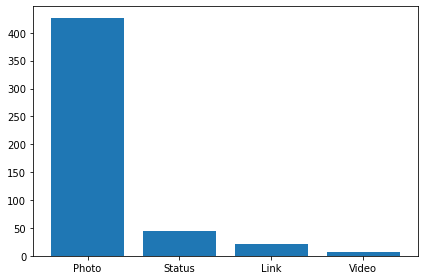

In [195]:
type_data = fb_df.Type.value_counts(sort=False)
plt.bar(type_data.index, type_data.values)
plt.tight_layout();

In [196]:
fb_df.Category.unique()

array([2, 3, 1])

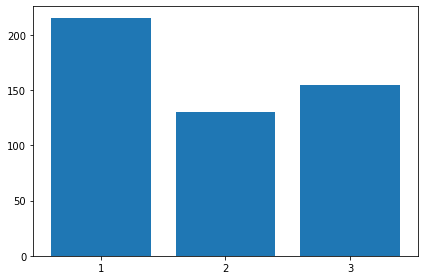

In [197]:
category_data = fb_df.Category.value_counts(sort=False)
plt.bar(category_data.index, category_data.values)
plt.xticks([1, 2, 3])
plt.tight_layout();

In [198]:
fb_df.Paid.unique()

array([ 0.,  1., nan])

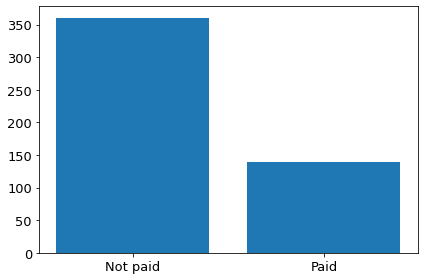

In [199]:
paid_data = fb_df.Paid.value_counts(sort=False)
plt.bar(paid_data.index, paid_data.values)
plt.xticks(ticks=range(2), labels=['Not paid', 'Paid'], fontsize=13)
plt.yticks(fontsize=13)
plt.tight_layout();

In [200]:
fb_df[['Paid']].shape

(500, 1)

In [201]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
impute = SimpleImputer(strategy='most_frequent', missing_values=pd.NA)
df_tr = impute.fit_transform(fb_df[['Paid', 'Type', 'Category']])
ohe = OneHotEncoder(sparse=False, drop='first')
output = ohe.fit_transform(df_tr)
print(output.shape)
output[:20,]

(500, 6)


array([[0., 1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 0., 1.],
       [1., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0.],
       [1., 1., 0., 0., 0., 1.],
       [1., 1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0.],
       [1., 1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 0., 1.],
       [1., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1.]])

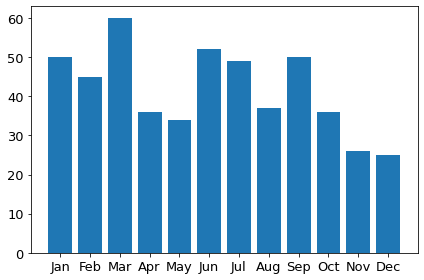

In [202]:
plt.bar(range(12), fb_df['Post Month'].value_counts(sort=False))
months=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=range(12), labels=months, fontsize=13)
plt.yticks(fontsize=13)
plt.tight_layout();

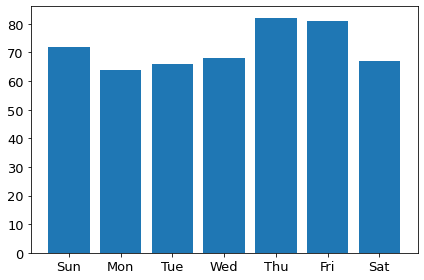

In [203]:
plt.bar(range(7), fb_df['Post Weekday'].value_counts(sort=False))
days = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
plt.xticks(ticks=range(7), labels=days, fontsize=13)
plt.yticks(fontsize=13)
plt.tight_layout();

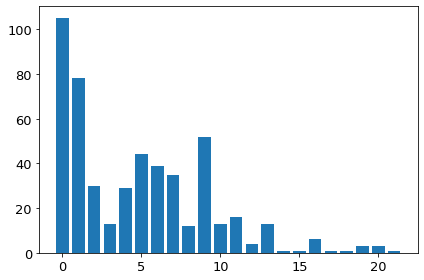

In [204]:
plt.bar(range(22), fb_df['Post Hour'].value_counts(sort=False))
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.tight_layout();